# GPT-4 took a go at analyzing the data.

In [1]:
# Let's start by loading the data from the CSV file into a pandas DataFrame.
import pandas as pd

# Load the data
data = pd.read_csv("data/D202.csv")

# Show the first few rows of the DataFrame
data.head()

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,10/22/2016,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,10/22/2016,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,10/22/2016,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,10/22/2016,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,10/22/2016,1:00,1:14,0.01,kWh,$0.00,NaN


In [2]:
# Check the data types of the columns
data_types = data.dtypes

# Check for missing values
missing_values = data.isnull().sum()

# Convert the 'COST' column to a numerical type
data['COST'] = data['COST'].replace('[\$,]', '', regex=True).astype(float)

# Get basic statistics of numerical columns
numerical_stats = data.describe()

data_types, missing_values, numerical_stats


(TYPE           object
 DATE           object
 START TIME     object
 END TIME       object
 USAGE         float64
 UNITS          object
 COST           object
 NOTES         float64
 dtype: object,
 TYPE              0
 DATE              0
 START TIME        0
 END TIME          0
 USAGE             0
 UNITS             0
 COST              0
 NOTES         70368
 dtype: int64,
               USAGE          COST  NOTES
 count  70368.000000  70368.000000    0.0
 mean       0.121941      0.024684    NaN
 std        0.210507      0.042646    NaN
 min        0.000000      0.000000    NaN
 25%        0.030000      0.010000    NaN
 50%        0.050000      0.010000    NaN
 75%        0.120000      0.020000    NaN
 max        2.360000      0.650000    NaN)

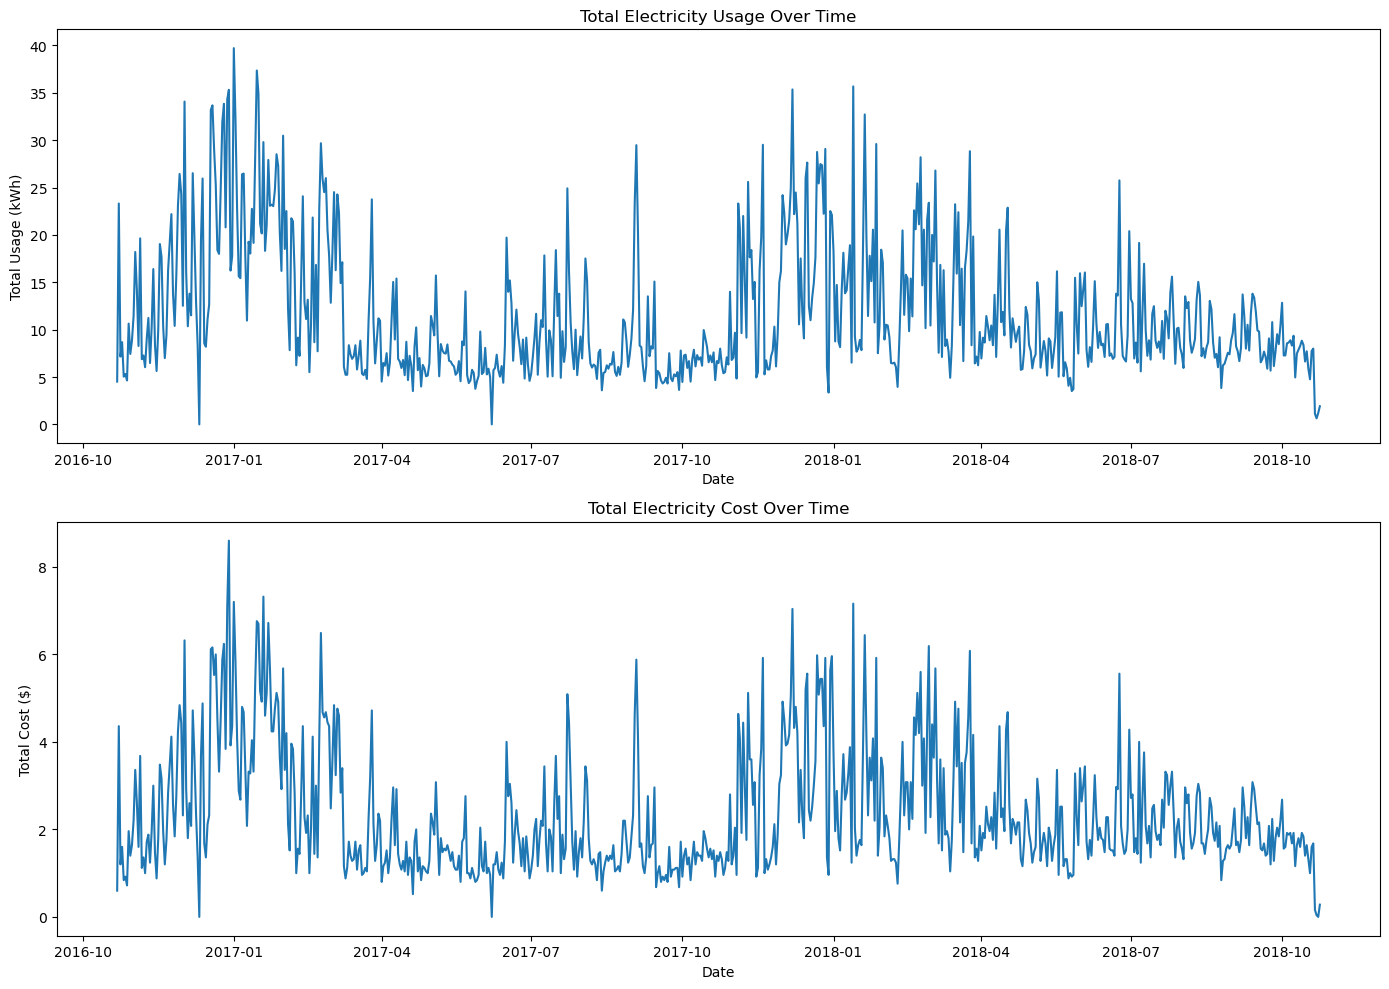

In [3]:
import matplotlib.pyplot as plt

# Convert the 'DATE' column to a datetime type
data['DATE'] = pd.to_datetime(data['DATE'])

# Group by date and calculate total usage and cost for each date
grouped_data = data.groupby('DATE').agg({'USAGE': 'sum', 'COST': 'sum'})

# Create plots
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot total usage over time
ax[0].plot(grouped_data.index, grouped_data['USAGE'])
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Total Usage (kWh)')
ax[0].set_title('Total Electricity Usage Over Time')

# Plot total cost over time
ax[1].plot(grouped_data.index, grouped_data['COST'])
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total Cost ($)')
ax[1].set_title('Total Electricity Cost Over Time')

plt.tight_layout()
plt.show()

Error but going on.


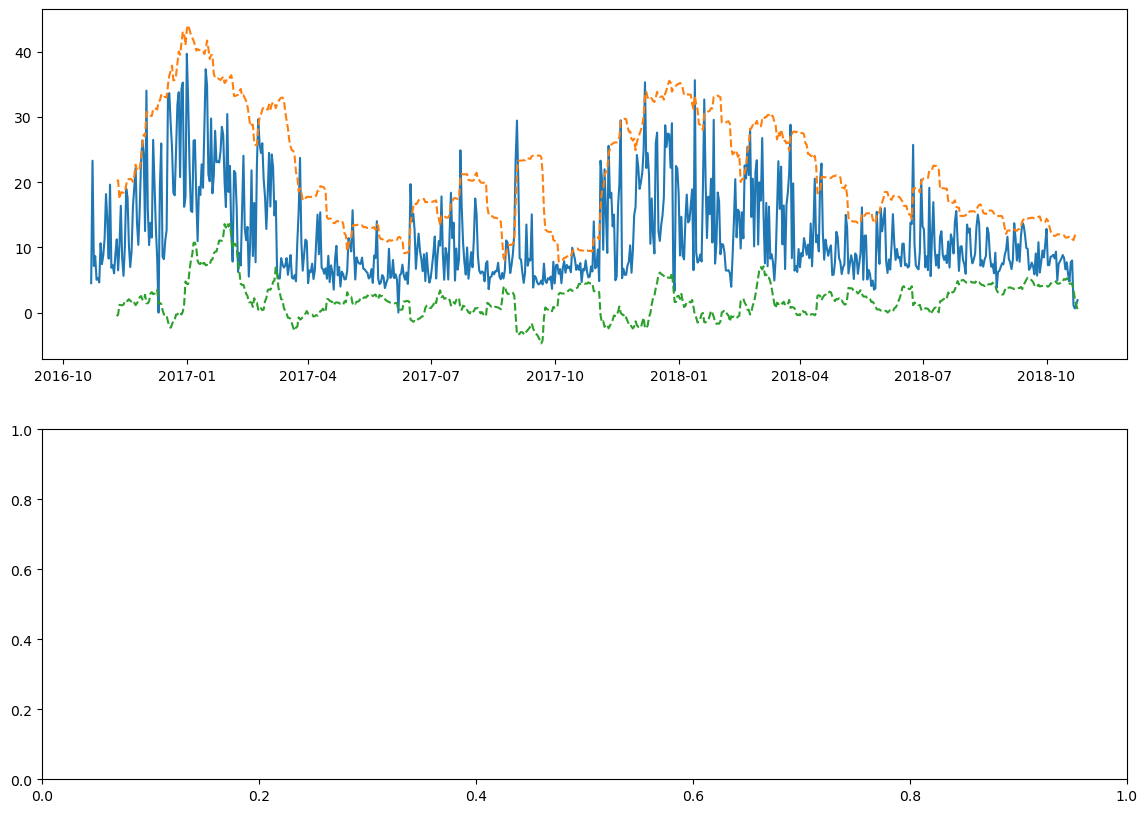

In [4]:
try:
    # Define the lookback period
    lookback_period = 20
    
    # Calculate the simple moving average and the standard deviation
    grouped_data['USAGE_SMA'] = grouped_data['USAGE'].rolling(window=lookback_period).mean()
    grouped_data['USAGE_STD'] = grouped_data['USAGE'].rolling(window=lookback_period).std()
    grouped_data['COST_SMA'] = grouped_data['COST'].rolling(window=lookback_period).mean()
    grouped_data['COST_STD'] = grouped_data['COST'].rolling(window=lookback_period).std()
    
    # Calculate the Bollinger Bands
    grouped_data['USAGE_UPPER_BAND'] = grouped_data['USAGE_SMA'] + (grouped_data['USAGE_STD'] * 2)
    grouped_data['USAGE_LOWER_BAND'] = grouped_data['USAGE_SMA'] - (grouped_data['USAGE_STD'] * 2)
    grouped_data['COST_UPPER_BAND'] = grouped_data['COST_SMA'] + (grouped_data['COST_STD'] * 2)
    grouped_data['COST_LOWER_BAND'] = grouped_data['COST_SMA'] - (grouped_data['COST_STD'] * 2)
    
    # Identify points where usage/cost exceed the bands
    grouped_data['EXCEED_USAGE_UPPER'] = grouped_data['USAGE'] > grouped_data['USAGE_UPPER_BAND']
    grouped_data['EXCEED_COST_UPPER'] = grouped_data['COST'] > grouped_data['COST_UPPER_BAND']
    grouped_data['EXCEED_USAGE_LOWER'] = grouped_data['USAGE'] < grouped_data['USAGE_LOWER_BAND']
    grouped_data['EXCEED_COST_LOWER'] = grouped_data['COST'] < grouped_data['COST_LOWER_BAND']
    
    # Create plots with Bollinger Bands and points that exceed the bands
    fig, ax = plt.subplots(2, 1, figsize=(14, 10))
    
    # Plot usage with Bollinger Bands
    ax[0].plot(grouped_data.index, grouped_data['USAGE'], label='Usage')
    ax[0].plot(grouped_data.index, grouped_data['USAGE_UPPER_BAND'], label='Upper Band', linestyle='--')
    ax[0].plot(grouped_data.index, grouped_data['USAGE_LOWER_BAND'], label='Lower Band', linestyle='--')
    ax[0].scatter(grouped_data.index, grouped_data.loc[grouped_data['EXCEED_USAGE_UPPER'], 'USAGE'], color='red', label='Exceed Upper Band')
    ax[0].scatter(grouped_data.index, grouped_data.loc[grouped_data['EXCEED_USAGE_LOWER'], 'USAGE'], color='green', label='Exceed Lower Band')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Usage (kWh)')
    ax[0].set_title('Electricity Usage with Bollinger Bands')
    ax[0].legend()
    
    # Plot cost with Bollinger Bands
    ax[1].plot(grouped_data.index, grouped_data['COST'], label='Cost')
    ax[1].plot(grouped_data.index, grouped_data['COST_UPPER_BAND'], label='Upper Band', linestyle='--')
    ax[1].plot(grouped_data.index, grouped_data['COST_LOWER_BAND'], label='Lower Band', linestyle='--')
    ax[1].scatter(grouped_data.index, grouped_data.loc[grouped_data['EXCEED_COST_UPPER'], 'COST'], color='red', label='Exceed Upper Band')
    ax[1].scatter(grouped_data.index, grouped_data.loc[grouped_data['EXCEED_COST_LOWER'], 'COST'], color='green', label='Exceed Lower Band')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Cost ($)')
    ax[1].set_title('Electricity Cost with Bollinger Bands')
    ax[1].legend()
    
    plt.tight_layout()
    plt.show()
except ValueError:
    print("Error but going on.")

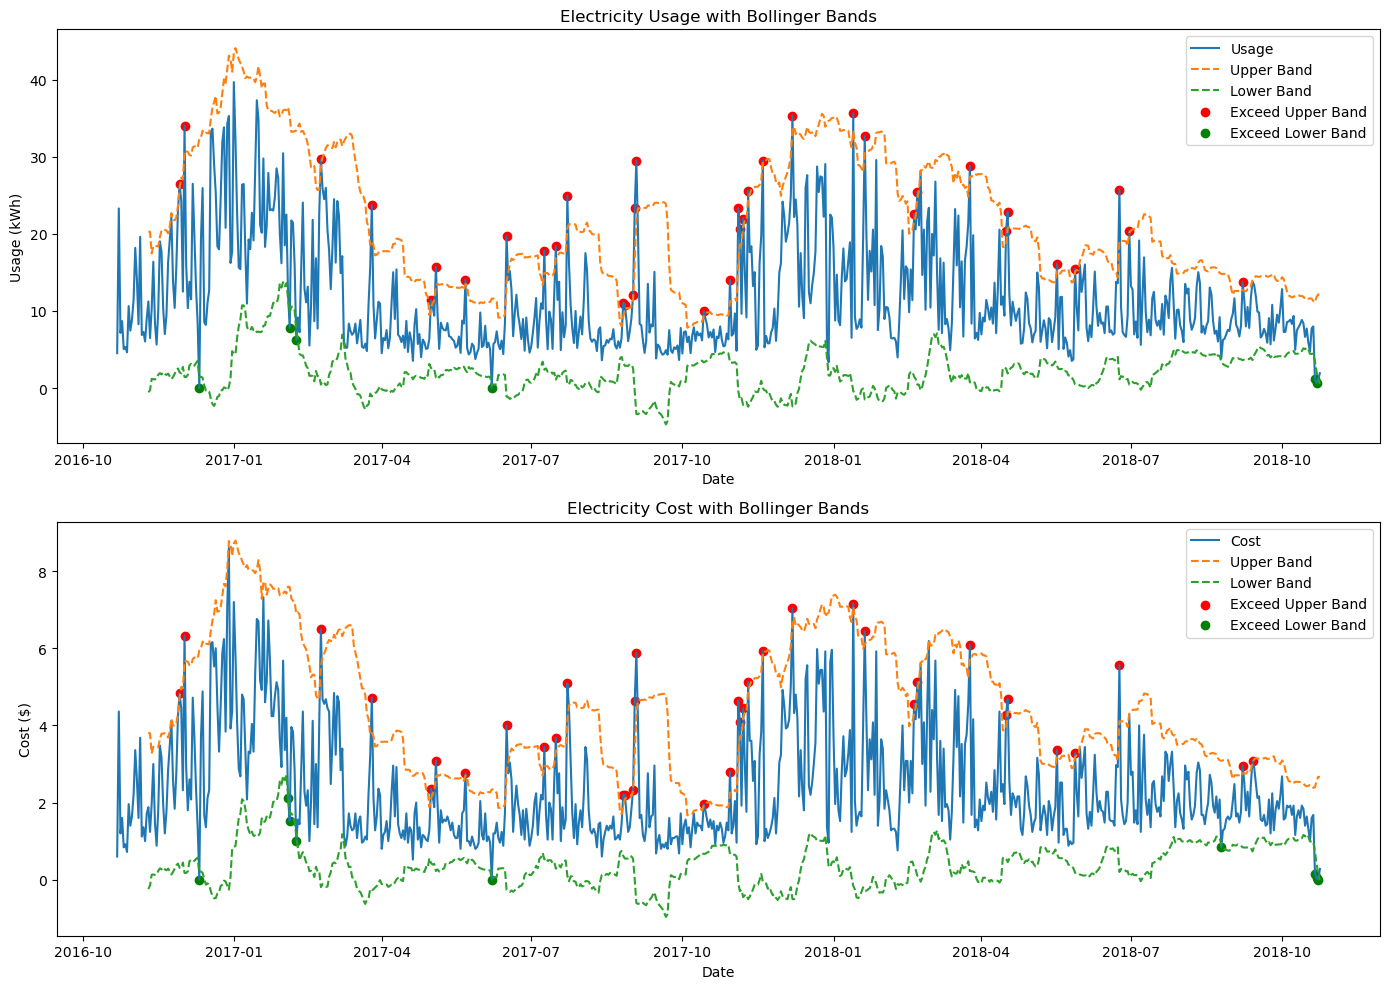

In [5]:
# Create dataframes for the days where the usage and cost exceed the Bollinger Bands
exceed_usage_upper = grouped_data[grouped_data['EXCEED_USAGE_UPPER']]
exceed_usage_lower = grouped_data[grouped_data['EXCEED_USAGE_LOWER']]
exceed_cost_upper = grouped_data[grouped_data['EXCEED_COST_UPPER']]
exceed_cost_lower = grouped_data[grouped_data['EXCEED_COST_LOWER']]

# Create plots with Bollinger Bands and points that exceed the bands
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Plot usage with Bollinger Bands
ax[0].plot(grouped_data.index, grouped_data['USAGE'], label='Usage')
ax[0].plot(grouped_data.index, grouped_data['USAGE_UPPER_BAND'], label='Upper Band', linestyle='--')
ax[0].plot(grouped_data.index, grouped_data['USAGE_LOWER_BAND'], label='Lower Band', linestyle='--')
ax[0].scatter(exceed_usage_upper.index, exceed_usage_upper['USAGE'], color='red', label='Exceed Upper Band')
ax[0].scatter(exceed_usage_lower.index, exceed_usage_lower['USAGE'], color='green', label='Exceed Lower Band')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Usage (kWh)')
ax[0].set_title('Electricity Usage with Bollinger Bands')
ax[0].legend()

# Plot cost with Bollinger Bands
ax[1].plot(grouped_data.index, grouped_data['COST'], label='Cost')
ax[1].plot(grouped_data.index, grouped_data['COST_UPPER_BAND'], label='Upper Band', linestyle='--')
ax[1].plot(grouped_data.index, grouped_data['COST_LOWER_BAND'], label='Lower Band', linestyle='--')
ax[1].scatter(exceed_cost_upper.index, exceed_cost_upper['COST'], color='red', label='Exceed Upper Band')
ax[1].scatter(exceed_cost_lower.index, exceed_cost_lower['COST'], color='green', label='Exceed Lower Band')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Cost ($)')
ax[1].set_title('Electricity Cost with Bollinger Bands')
ax[1].legend()

plt.tight_layout()
plt.show()